In this section, we can build the Regression model. For doing this, I use PyCaret package that is based on Sklearn Library. It contains some steps that are in the following:

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('Dataset/final_dataset.pickle', 'rb') as file:
    df = pickle.load(file)

df.head(3)

,Type,Municipality,NearStation,Price,FloorPlan,Area,LandShape,Frontage,BuildingYear,Structure,Use,Direction,Renovation
2,Residential Land(Land and Building),Chiyoda Ward,4.0,120000000,1K,65,Semi-rectangular Shaped,6.5,1970.0,S,House,South,Not yet
5,Residential Land(Land and Building),Chiyoda Ward,5.0,300000000,1K,210,Semi-rectangular Shaped,13.0,1982.0,RC,Other,Northeast,Not yet
6,Residential Land(Land and Building),Chiyoda Ward,4.0,170000000,1K,105,Semi-rectangular Shaped,6.8,1970.0,RC,Office,Northeast,Not yet


In [3]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


<hr>

## 1 - Declare Features

To begin with, we should declare all features based on their type.

In [4]:
num_f = ['NearStation', 'Area' , 'Frontage', 'BuildingYear']

cat_f = ['Type', 'Municipality', 'FloorPlan', 'LandShape', 'Structure', 'Use', 'Direction', 'Renovation']

ord_f = []

date_f = []

<hr>

## 2 - Set up Regressor

I set up the regressor and its settings. All of them are based and customized of this project and they might be different for another project and data context.

In [5]:
from pycaret.regression import *

In [29]:
reg = setup(
    #Model Selection
    data = df,    target = 'Price',    train_size = 0.75,    fold = 10,    session_id = 42,
    
    #Data Types
    numeric_features = num_f,    categorical_features = cat_f,    ignore_features = None)

,Description,Value
0,Session id,42
1,Target,Price
2,Target type,Regression
3,Original data shape,"(2046, 13)"
4,Transformed data shape,"(2046, 47)"
5,Transformed train set shape,"(1534, 47)"
6,Transformed test set shape,"(512, 47)"
7,Numeric features,4
8,Categorical features,8
9,Preprocess,True


<hr>

## 3 - Train Model

Now, we train the model and in the first step, run all regression models. Having said that, I iterated this process and setup, to find the best result in this step.

In [30]:
compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,67456098.8333,17962678395964634.0000,132410897.2852,0.8465,0.4787,0.5022,0.9750
rf,Random Forest Regressor,70175624.2884,22128726387439312.0000,146718579.4538,0.8143,0.4677,0.4949,1.2940
ridge,Ridge Regression,83102096.4101,22211429375950432.0000,147439644.0386,0.8182,0.8490,0.8142,0.8120
lasso,Lasso Regression,83542434.9882,22526161459806484.0000,148541437.1957,0.8143,0.8514,0.8247,0.8400
llar,Lasso Least Angle Regression,83542287.1602,22526450656609748.0000,148542373.3351,0.8143,0.8514,0.8247,0.8360
lr,Linear Regression,83550505.7756,22528299600334912.0000,148548874.7685,0.8143,0.8538,0.8247,1.2260
en,Elastic Net,82935767.0568,22741905601273480.0000,149154828.9067,0.8159,0.8008,0.7016,0.7930
omp,Orthogonal Matching Pursuit,84645003.7648,22757088005610376.0000,149444180.7783,0.8128,0.8967,0.7759,0.8060
et,Extra Trees Regressor,70767092.1187,22940446298848096.0000,149693685.6720,0.8082,0.4806,0.5024,1.3420
huber,Huber Regressor,84282032.2259,26311311265115448.0000,160549329.3782,0.7948,0.5633,0.6108,0.8780


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=42)

So, we create model:

In [31]:
reg_gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,62439761.1708,12112040800982148.0000,110054717.3045,0.8708,0.4881,0.4448
1,64990906.8133,15398525641692014.0000,124090795.9588,0.8985,0.4377,0.4215
2,60990599.9102,14580671627107926.0000,120750451.8712,0.9472,0.3967,0.3370
3,65714606.8771,14571261635730062.0000,120711480.9607,0.8856,0.5005,0.5311
4,75820887.1794,32425525285747348.0000,180070889.6123,0.8170,0.4266,0.3879
5,74844594.8382,16437258289665612.0000,128207871.4029,0.7907,0.6073,1.0360
6,74409708.4732,22152456987865564.0000,148837014.8446,0.8291,0.4730,0.4565
7,63078949.0199,13983617616090134.0000,118252347.1906,0.8276,0.4674,0.4090
8,62704032.3186,14004119781107586.0000,118339003.6341,0.9378,0.4508,0.4131


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

<hr>

## 4- Hyper-parameter Tunning

Now we can hyper tune and optimze the ridge model for having better result.

in both RMSE and R2, GradientBoostingRegressor is the best.

<b><u>RMSE (Mean Squared Error)</u></b> >>>> Accuracy</br></br>
<i> The Root Mean Squared Error measures the average root squared difference between the predicted and actual values. It is calculated by taking the square of the difference between the predicted and actual values for each data point, and then taking the mean of these root squared differences. A smaller value of RMSE indicates better performance, as it means the model's predictions are closer to the actual values on average. In the table, the model with the lowest RMSE (150,862,585) indicates the model's predictions are off by around 150,862,585 Yen root squared from the future actual values. </i>

<b><u>R2 (R-squared)</u></b> >>>> Fit </br></br>
<i> The coefficient of determination, or R-squared, measures the proportion of variance in the target variable that can be explained by the independent variables in the model. An R-squared value of 1 indicates a perfect fit, meaning all the variance in the target variable is explained by the independent variables in the model. On the other hand, an R-squared value of 0 indicates that the model does not explain any of the variance in the target variable. In the table , the model with the highest R-squared (0.8117) indicates that around 81.17% of the variance in the target variable can be explained by the independent variables in the model. </i>

In [32]:
tuned_reg_gbr = tune_model(reg_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70528304.3387,13630789434735930.0000,116750971.8792,0.8546,0.7434,0.5484
1,71782226.8403,15688617653598238.0000,125254212.1192,0.8966,0.6257,0.5325
2,71379536.2929,22681295858519324.0000,150603107.0679,0.9179,0.5148,0.4379
3,75806412.9559,17717049686161504.0000,133105408.1777,0.8609,0.7074,0.7453
4,91117239.4767,39694726986558976.0000,199235355.7644,0.7760,0.6614,0.5240
5,85123493.1259,20694015032505184.0000,143854144.9959,0.7365,0.7140,1.0252
6,87161858.5998,27520678546781364.0000,165893575.9660,0.7877,0.6581,0.6361
7,76507966.2477,17580871137526798.0000,132592877.4012,0.7833,0.8839,0.5818
8,73497027.6008,27659898738695992.0000,166312653.5736,0.8772,0.6277,0.4978


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


<hr>

## 6 - Analyze model on Train and Test

Now, we can analyze the performance of trained model on hold-out set (test).

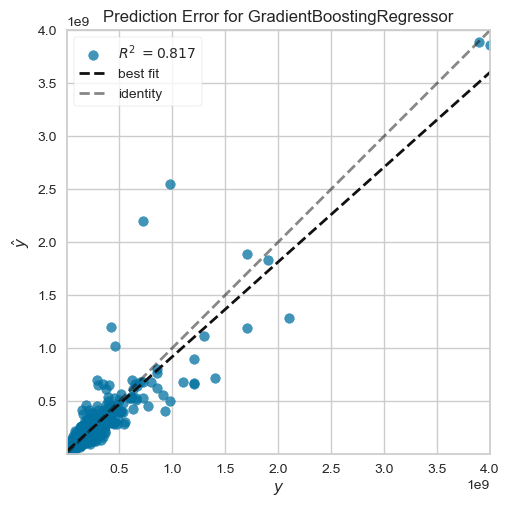

In [34]:
plot_model(reg_gbr, plot = 'error')

A Prediction Error plot is a graphical representation of the difference between the actual price and the predicted price of a regression model. It is a useful way to understand the distribution and magnitude of the errors made by the model across the range of price values. The Prediction Error plot for the reg_GBR model will show the predicted price (x-axis) versus the difference between the actual and predicted price values (y-axis). since the errors are evenly distributed around zero and have no apparent pattern or trend, it suggests that the reg_GBR model has accurately predicted the price values.

<hr>

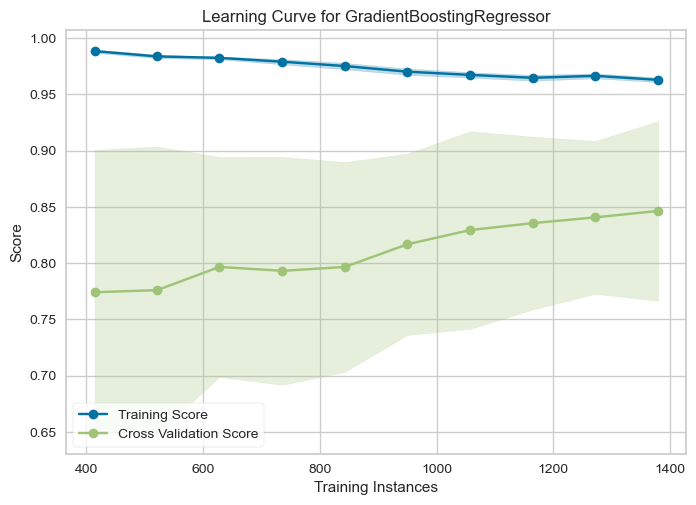

In [35]:
plot_model(reg_gbr, plot = 'learning')

A Learning Curve plot is a graphical representation of the training and validation performance of a model as a function of the number of training samples. It is a useful way to understand the bias-variance tradeoff of a model and to identify whether the model is underfitting or overfitting the data. The validation score increases with the number of training samples but eventually reaches a plateau, indicating that the model is not overfitting the data. The gap between the training and validation scores is becoming small and stable, indicating that the model is not overfitting or underfitting the data.

<hr>

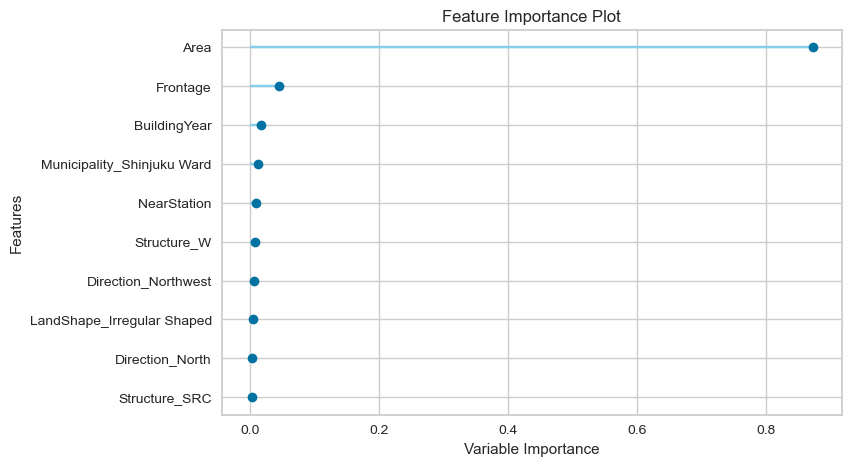

In [36]:
plot_model(reg_gbr, plot = 'feature')

An Importance Plot is a graphical representation of the relative importance of the predictor variables in a regression model. It is a useful way to understand the contribution of each variable to the prediction of the price. This plot shows the area is much more important feature to predict the price of house and it makes sense in the context of real state industry. Thus, the model is not overfit.

<hr>

## 7 - Finalize Model

Now, we run the trained model on test to see the result.

In [37]:
predict_model(reg_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,64752843.0483,21833269736398440.0000,147760853.1933,0.8165,0.4715,0.6909


,Type,Municipality,NearStation,FloorPlan,Area,LandShape,Frontage,BuildingYear,Structure,Use,Direction,Renovation,Price,prediction_label
592,Residential Land(Land and Building),Chuo Ward,3.0,1K,100,Semi-rectangular Shaped,7.0,1967.0,RC,Office,Southwest,Not yet,180000000,1.538474e+08
1928,Residential Land(Land and Building),Shinjuku Ward,5.0,1K,165,Semi-square Shaped,11.6,2017.0,RC,Housing Complex,East,Not yet,430000000,2.910717e+08
676,Residential Land(Land and Building),Chuo Ward,3.0,1K,75,Semi-rectangular Shaped,8.6,1998.0,RC,House,Southeast,Not yet,140000000,1.257545e+08
858,Residential Land(Land and Building),Minato Ward,5.0,1K,55,Semi-rectangular Shaped,3.5,1987.0,S,House,West,Not yet,130000000,8.545243e+07
2191,Residential Land(Land and Building),Shinjuku Ward,9.0,1K,145,Rectangular Shaped,9.0,2009.0,W,House,South,Not yet,110000000,1.568158e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,Residential Land(Land and Building),Shinjuku Ward,7.0,1K,100,Rectangular Shaped,15.0,1966.0,W,Housing Complex,East,Not yet,57000000,3.037063e+07
1391,Residential Land(Land and Building),Chuo Ward,2.0,1K,200,Rectangular Shaped,25.5,1992.0,S,Office,Southeast,Not yet,320000000,3.227867e+08
1217,Residential Land(Land and Building),Chuo Ward,3.0,1K,195,Semi-rectangular Shaped,16.0,1960.0,RC,Housing Complex,Northwest,Not yet,200000000,2.636065e+08
748,Residential Land(Land and Building),Chuo Ward,6.0,1K,330,Semi-shaped,15.0,1990.0,SRC,House,Southwest,Not yet,910000000,5.535105e+08


Now we finalize the model. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [40]:
final_gbr = finalize_model(reg_gbr)
final_gbr

Pipeline(memory=FastMemory(location=C:\Users\Mehrdad\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['NearStation', 'Area', 'Frontage',
                                             'BuildingYear'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Type', 'Municipality',
                                             'FloorPlan', 'LandShape',
                                             'Structure', 'Use', 'Direction',
                                             'Renovati...
                 TransformerWrapper(include=['Type', 'Municipality',
                                             'FloorPlan', 'LandShape',
                                             'Structure', 'Use', 'Direction',
                                             'Renovation'],
                                    transformer=OneHotEncoder(cols=['Type',
  

In [41]:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,47732940.6573,6460176213285496.0000,80375221.3887,0.9457,0.4347,0.6172


,Type,Municipality,NearStation,FloorPlan,Area,LandShape,Frontage,BuildingYear,Structure,Use,Direction,Renovation,Price,prediction_label
592,Residential Land(Land and Building),Chuo Ward,3.0,1K,100,Semi-rectangular Shaped,7.0,1967.0,RC,Office,Southwest,Not yet,180000000,1.609524e+08
1928,Residential Land(Land and Building),Shinjuku Ward,5.0,1K,165,Semi-square Shaped,11.6,2017.0,RC,Housing Complex,East,Not yet,430000000,2.951968e+08
676,Residential Land(Land and Building),Chuo Ward,3.0,1K,75,Semi-rectangular Shaped,8.6,1998.0,RC,House,Southeast,Not yet,140000000,1.315273e+08
858,Residential Land(Land and Building),Minato Ward,5.0,1K,55,Semi-rectangular Shaped,3.5,1987.0,S,House,West,Not yet,130000000,9.076897e+07
2191,Residential Land(Land and Building),Shinjuku Ward,9.0,1K,145,Rectangular Shaped,9.0,2009.0,W,House,South,Not yet,110000000,1.493136e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,Residential Land(Land and Building),Shinjuku Ward,7.0,1K,100,Rectangular Shaped,15.0,1966.0,W,Housing Complex,East,Not yet,57000000,3.886815e+07
1391,Residential Land(Land and Building),Chuo Ward,2.0,1K,200,Rectangular Shaped,25.5,1992.0,S,Office,Southeast,Not yet,320000000,3.255838e+08
1217,Residential Land(Land and Building),Chuo Ward,3.0,1K,195,Semi-rectangular Shaped,16.0,1960.0,RC,Housing Complex,Northwest,Not yet,200000000,2.561961e+08
748,Residential Land(Land and Building),Chuo Ward,6.0,1K,330,Semi-shaped,15.0,1990.0,SRC,House,Southwest,Not yet,910000000,7.856193e+08


<hr>

## 8 - Save Model

Now we cane the final model for future prediction.

In [47]:
Model = save_model(final_gbr,'Model/Final Regression Model')

Transformation Pipeline and Model Successfully Saved


we also export the variables names.

In [51]:
import json

columns = {
    'data_columns' : [col.lower() for col in X_test.columns]
}
with open("Model/columns.json","w") as f:
    f.write(json.dumps(columns))